In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
home=os.path.expanduser("~")
sys.path.append(os.path.join(home, 'station2grid'))

import tools
from tools import options, datasets, knn_model, krg_model


In [43]:
info = tools.CommonObj().epa_station_info
info.head(1)

,SiteName,SiteEngName,area,lat,lon,lat_round,lon_round,row,col
0,大霸尖山,Dabajianshan,mountain,24.461111,121.249722,24.46,121.25,88,125


In [44]:
stations = info.SiteEngName

# knn

## step by step

In [33]:
k = 3
weightKNN = 'uniform'
val_stations = 'Tainan'

In [34]:
optionS2GSD = options.OptionS2GSD(features='pm25', val_stations=val_stations)
dataS2G = datasets.DataS2G(optionS2GSD)
dataS2G.setup_test()

model = knn_model.KnnModel(dataS2G)
y_hat = model.get_values(k, weightKNN).reshape(-1)

In [35]:
y_true = dataS2G.x_raw[:,dataS2G.valid_info.index,0].reshape(-1)

In [36]:
group = 'model_name-knn--val_stations-%s--k-%s--weightKNN-%s'%(val_stations, k, weightKNN)
result = tools.get_predict_result(y_true, y_hat, group, val_station_names=val_stations.split('_'))
result.head()

is_real,group,station,dt,predict,real
0,model_name-knn--val_stations-Tainan--k-7--weig...,Tainan,2019-01-01 00:00:00,11.428571,17.0
1,model_name-knn--val_stations-Tainan--k-7--weig...,Tainan,2019-01-01 01:00:00,15.571429,20.0
2,model_name-knn--val_stations-Tainan--k-7--weig...,Tainan,2019-01-01 02:00:00,13.571429,14.0
3,model_name-knn--val_stations-Tainan--k-7--weig...,Tainan,2019-01-01 03:00:00,14.285714,15.0
4,model_name-knn--val_stations-Tainan--k-7--weig...,Tainan,2019-01-01 04:00:00,13.142857,10.0


In [37]:
file_name = ''.join([group, '.csv']) 
path = os.path.join('../results', file_name) 
path

'../results/model_name-knn--val_stations-Tainan--k-7--weightKNN-uniform.csv'

In [38]:
result.to_csv(path, index=False)

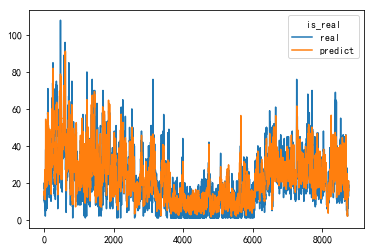

In [39]:
result.plot(y=['real','predict'])

## iterate 

In [ ]:
for k in [1,2,3,4,5]:
    for weightKNN in ['uniform','distance']:
        for val_stations in stations:
            optionS2GSD = options.OptionS2GSD(features='pm25', val_stations=val_stations)
            dataS2G = datasets.DataS2G(optionS2GSD)
            dataS2G.setup_test()

            model = knn_model.KnnModel(dataS2G)
            y_hat = model.get_values(k, weightKNN).reshape(-1)         
            y_true = dataS2G.x_raw[:,dataS2G.valid_info.index,0].reshape(-1)

            group = 'model_name-knn--val_stations-%s--k-%s--weightKNN-%s'%(val_stations, k, weightKNN)
            result = tools.get_predict_result(y_true, y_hat, group, val_station_names=val_stations.split('_'))

            file_name = ''.join([group, '.csv']) 
            path = os.path.join('../results', file_name) 
            result.to_csv(path, index=False)


# krg

## step by step

In [25]:
optionS2GSD = options.OptionS2GSD(features='pm25', val_stations=val_stations)
dataS2G = datasets.DataS2G(optionS2GSD)
dataS2G.setup_test()

In [26]:
model = krg_model.KrgModel(dataS2G)
y_hat = model.get_values().reshape(-1)

In [27]:
y_true = dataS2G.x_raw[:,dataS2G.valid_info.index,0].reshape(-1)

In [28]:
group = 'model_name-krg--val_stations-%s'%(val_stations)
result = tools.get_predict_result(y_true, y_hat, group, val_station_names=val_stations.split('_'))
result.head()

is_real,group,station,dt,predict,real
0,model_name-krg--val_stations-Tainan,Tainan,2019-01-01 00:00:00,11.735243,17.0
1,model_name-krg--val_stations-Tainan,Tainan,2019-01-01 01:00:00,15.324699,20.0
2,model_name-krg--val_stations-Tainan,Tainan,2019-01-01 02:00:00,13.583322,14.0
3,model_name-krg--val_stations-Tainan,Tainan,2019-01-01 03:00:00,13.872104,15.0
4,model_name-krg--val_stations-Tainan,Tainan,2019-01-01 04:00:00,11.247561,10.0


In [29]:
file_name = ''.join([group, '.csv']) 
path = os.path.join('../results', file_name) 
path

'../results/model_name-krg--val_stations-Tainan.csv'

In [30]:
result.to_csv(path, index=False)

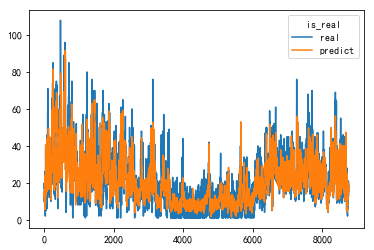

In [31]:
result.plot(y=['real','predict'])

## iterate 

In [ ]:
for val_stations in stations:
    optionS2GSD = options.OptionS2GSD(features='pm25', val_stations=val_stations)
    dataS2G = datasets.DataS2G(optionS2GSD)
    dataS2G.setup_test()    

    model = krg_model.KrgModel(dataS2G)
    y_hat = model.get_values().reshape(-1)

    y_true = dataS2G.x_raw[:,dataS2G.valid_info.index,0].reshape(-1)

    group = 'model_name-krg--val_stations-%s'%(val_stations)
    result = tools.get_predict_result(y_true, y_hat, group, val_station_names=val_stations.split('_'))

    file_name = ''.join([group, '.csv']) 
    path = os.path.join('../results', file_name) 
    result.to_csv(path, index=False)